### FB ADS ANALYSIS 

##### Features:

* Interest1,2,3: are the user interests and likes of facebook users who were taregted for the ad, we not use for this wok


#### Steps:

* Cleaning data
* Marketing metrics (KPIs)missing we, creating additional features
 1. Click-through-rate (CTR)
 2. Cost Per Click (CPC)
 3. Cost Per Action
 4. Cost Per Thousand/Mille (CPM)
* Identifying the best parameters of each feature for efficient ads and High Roas
* Final suggestions for the ideal campaign


In [169]:
import pandas as pd 
df= pd.read_csv("C:/Users/Alessandro/Desktop/fb ads/df ads.csv")

In [170]:
#df.info()

In [171]:
df.shape
# There are 15 columns and 1143 rows

(1143, 21)

In [172]:
#This produces a list below showing the percentage of missing values for each of the features.

import numpy as np
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ad_id - 0.0%
AdText - 2.0%
reporting_start - 0.0%
reporting_end - 0.0%
campaign_id - 0.0%
Location - 0.0%
Placements - 0.0%
fb_campaign_id - 0.0%
PeopleWhoMatch - 71.0%
age - 0.0%
gender - 0.0%
Politics - 100.0%
AdSpendCurrency - 27.0%
interest1 - 0.0%
interest2 - 0.0%
interest3 - 0.0%
impressions - 0.0%
clicks - 0.0%
spent - 0.0%
total_conversion - 33.0%
approved_conversion - 33.0%


In [173]:
# take Ad Spend Currency, 27% of data are miss, 834-1143= 309 value miss
df["AdSpendCurrency"].value_counts()

RUB    834
Name: AdSpendCurrency, dtype: int64

In [174]:
# Calculate the value
df['AdSpendCurrency'].value_counts(dropna=False)
#df['AdSpendCurrency'].isnull().value_counts()

RUB    834
NaN    309
Name: AdSpendCurrency, dtype: int64

In [175]:
# Replace a specif column with Text(str) in this case Fill NaN values and change with USD text.
df['AdSpendCurrency'].fillna('USD', inplace=True)

In [176]:
# show me the replace values
df['AdSpendCurrency'].value_counts(dropna=False)

RUB    834
USD    309
Name: AdSpendCurrency, dtype: int64

In [177]:
# 382 value with NaN, 33% of missing data 382-1143= 761 valid data 
df["total_conversion"].value_counts(dropna=False)

1.0     546
NaN     382
2.0      89
3.0      34
4.0      26
5.0      19
7.0       9
0.0       5
6.0       5
22.0      4
13.0      4
8.0       3
11.0      3
17.0      2
10.0      2
28.0      1
60.0      1
24.0      1
15.0      1
26.0      1
20.0      1
9.0       1
23.0      1
31.0      1
40.0      1
Name: total_conversion, dtype: int64

In [178]:
df['total_conversion'].fillna(0.0, inplace=True)
df["total_conversion"].value_counts(dropna=False)

1.0     546
0.0     387
2.0      89
3.0      34
4.0      26
5.0      19
7.0       9
6.0       5
22.0      4
13.0      4
11.0      3
8.0       3
10.0      2
17.0      2
28.0      1
31.0      1
23.0      1
9.0       1
20.0      1
24.0      1
60.0      1
40.0      1
26.0      1
15.0      1
Name: total_conversion, dtype: int64

In [179]:
df['approved_conversion'].value_counts(dropna=False)

0.0     408
NaN     382
1.0     273
2.0      43
3.0      15
4.0       6
8.0       3
6.0       2
7.0       2
5.0       2
14.0      2
12.0      1
9.0       1
21.0      1
17.0      1
10.0      1
Name: approved_conversion, dtype: int64

In [180]:
df['approved_conversion'].fillna(0.0, inplace=True)
df["approved_conversion"].value_counts(dropna=False)

0.0     790
1.0     273
2.0      43
3.0      15
4.0       6
8.0       3
6.0       2
7.0       2
5.0       2
14.0      2
12.0      1
9.0       1
21.0      1
17.0      1
10.0      1
Name: approved_conversion, dtype: int64

In [181]:
#Now we have 0% of Nan values in the columns we need
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ad_id - 0.0%
AdText - 2.0%
reporting_start - 0.0%
reporting_end - 0.0%
campaign_id - 0.0%
Location - 0.0%
Placements - 0.0%
fb_campaign_id - 0.0%
PeopleWhoMatch - 71.0%
age - 0.0%
gender - 0.0%
Politics - 100.0%
AdSpendCurrency - 0.0%
interest1 - 0.0%
interest2 - 0.0%
interest3 - 0.0%
impressions - 0.0%
clicks - 0.0%
spent - 0.0%
total_conversion - 0.0%
approved_conversion - 0.0%


#### marketing metrics missing that can be added to drive more useful information from this dataset.


* Click-through-rate (CTR): 
    1. Refers to percentage of impressions that became clicks. 
    2. This metric helps understanding the success of an Ad and how engaging they are.


* Cost Per Click (CPC): 
    1. Denotes how much did each click cost. 
    2. This is useful for advertisers who have a set budget and do not want to overspent.


* Cost Per Acquisition(CPA): 
    1. identify the cost of a specific action performed by a user
    2. Is calculated as the cost divided by the number of actions being measured


* Cost Per Thousand/Mille (CPM): 
    1. Defines the price of 1,000 advertisement impression on one ad. 
    2. It is useful for campaigns that are focused on brand awareness.

In [183]:
df.head(1)

,ad_id,AdText,reporting_start,reporting_end,campaign_id,Location,Placements,fb_campaign_id,PeopleWhoMatch,age,...,Politics,AdSpendCurrency,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,Join us because we care. Black matters.,17/08/2017,17/08/2017,916,United States: Baltimore (+20 km) Maryland; St...,News Feed on desktop computers or News Feed on...,103916,NaN,30,...,NaN,RUB,15,17,17,7350.0,1,1.43,2.0,1.0


In [184]:
df["CTR"] = df["clicks"]/ df["impressions"]*100

In [185]:
df["CPC"] = df["spent"]/ df["clicks"]

In [186]:
df["CPM"] = df["spent"]/ df["impressions"]*1000

In [187]:
df["CPA"] = df["spent"]/ df["total_conversion"]

In [188]:
df.head(1)

,ad_id,AdText,reporting_start,reporting_end,campaign_id,Location,Placements,fb_campaign_id,PeopleWhoMatch,age,...,interest3,impressions,clicks,spent,total_conversion,approved_conversion,CTR,CPC,CPM,CPA
0,708746,Join us because we care. Black matters.,17/08/2017,17/08/2017,916,United States: Baltimore (+20 km) Maryland; St...,News Feed on desktop computers or News Feed on...,103916,NaN,30,...,17,7350.0,1,1.43,2.0,1.0,0.013605,1.43,0.194558,0.715


In [189]:
# Again we have some Nan values may be generated by division float for int
df["CPM"].isnull().sum()

4

In [190]:
df["CPM"].value_counts(dropna=False)
#df["CPM"].isnull.value_counts()

0.000000      350
NaN             4
0.469990        1
0.074587        1
578.034676      1
             ... 
0.458131        1
0.285714        1
0.164685        1
0.290505        1
0.232191        1
Name: CPM, Length: 791, dtype: int64

In [191]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ad_id - 0.0%
AdText - 2.0%
reporting_start - 0.0%
reporting_end - 0.0%
campaign_id - 0.0%
Location - 0.0%
Placements - 0.0%
fb_campaign_id - 0.0%
PeopleWhoMatch - 71.0%
age - 0.0%
gender - 0.0%
Politics - 100.0%
AdSpendCurrency - 0.0%
interest1 - 0.0%
interest2 - 0.0%
interest3 - 0.0%
impressions - 0.0%
clicks - 0.0%
spent - 0.0%
total_conversion - 0.0%
approved_conversion - 0.0%
CTR - 0.0%
CPC - 18.0%
CPM - 0.0%
CPA - 13.0%


In [192]:
df['CPM'].fillna(0.0, inplace=True)
df['CTR'].fillna(0.0, inplace=True)
df['CPC'].fillna(0.0, inplace=True)
df['CPA'].fillna(0.0, inplace=True)

In [193]:
# we have generate some inf value in CPA and CTR, need clean this value
df["CPA"].value_counts(dropna=False)

0.00     354
inf      233
1.38       5
1.29       4
1.50       3
        ... 
4.26       1
20.18      1
10.03      1
5.49       1
8.86       1
Name: CPA, Length: 501, dtype: int64

In [194]:
#This in Numpy replace all +inf -inf in df with nan
df.replace([np.inf, -np.inf], np.nan,inplace=True)

In [195]:
df["CPA"].value_counts(dropna=False)

0.00     354
NaN      233
1.38       5
1.29       4
1.50       3
        ... 
4.26       1
20.18      1
10.03      1
5.49       1
8.86       1
Name: CPA, Length: 501, dtype: int64

In [196]:
df['CPM'].fillna(0.0, inplace=True)
df['CTR'].fillna(0.0, inplace=True)
df['CPC'].fillna(0.0, inplace=True)
df['CPA'].fillna(0.0, inplace=True)

In [197]:
df["CPM"].value_counts(dropna=False)

0.000000      354
0.125274        1
0.162336        1
0.074587        1
578.034676      1
             ... 
106.269926      1
0.458131        1
0.285714        1
0.164685        1
0.232191        1
Name: CPM, Length: 790, dtype: int64

In [198]:
# Now we have clean the KPIs metrics
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ad_id - 0.0%
AdText - 2.0%
reporting_start - 0.0%
reporting_end - 0.0%
campaign_id - 0.0%
Location - 0.0%
Placements - 0.0%
fb_campaign_id - 0.0%
PeopleWhoMatch - 71.0%
age - 0.0%
gender - 0.0%
Politics - 100.0%
AdSpendCurrency - 0.0%
interest1 - 0.0%
interest2 - 0.0%
interest3 - 0.0%
impressions - 0.0%
clicks - 0.0%
spent - 0.0%
total_conversion - 0.0%
approved_conversion - 0.0%
CTR - 0.0%
CPC - 0.0%
CPM - 0.0%
CPA - 0.0%


In [199]:
#round the KPI 
df.round({"spent":2,'CTR': 2, 'CPC': 2, "CPM":2, "CPA":2}).head(1)

,ad_id,AdText,reporting_start,reporting_end,campaign_id,Location,Placements,fb_campaign_id,PeopleWhoMatch,age,...,interest3,impressions,clicks,spent,total_conversion,approved_conversion,CTR,CPC,CPM,CPA
0,708746,Join us because we care. Black matters.,17/08/2017,17/08/2017,916,United States: Baltimore (+20 km) Maryland; St...,News Feed on desktop computers or News Feed on...,103916,NaN,30,...,17,7350.0,1,1.43,2.0,1.0,0.01,1.43,0.19,0.71


In [200]:
#Top 10 ad_ids by number of impressions

df1= df.sort_values(by=['impressions'], ascending=False).head(10)

In [201]:
df2= df1[["ad_id","spent","clicks",'impressions','CTR','CPC','CPM',"CPA"]].round(2)

In [202]:
df2

,ad_id,spent,clicks,impressions,CTR,CPC,CPM,CPA
525,1121100,639.95,340,3052003.0,0.01,1.88,0.21,10.67
528,1121104,360.15,202,2080666.0,0.01,1.78,0.17,9.00
706,1121452,359.47,205,1663441.0,0.01,1.75,0.22,21.15
662,1121367,420.58,233,1447755.0,0.02,1.81,0.29,38.23
574,1121196,358.55,206,1392288.0,0.01,1.74,0.26,11.57
524,1121098,236.77,123,1267550.0,0.01,1.92,0.19,9.87
628,1121302,236.12,128,1206533.0,0.01,1.84,0.20,13.89
518,1121091,254.05,141,1194718.0,0.01,1.80,0.21,9.07
760,1121593,365.66,221,1177535.0,0.02,1.65,0.31,24.38
705,1121451,260.07,147,1117385.0,0.01,1.77,0.23,23.64


In [203]:
# This show the minimun values in df2
df2.style.apply(lambda x: ['background-color : red; font-size: 16px' if v==x.min() else 'font-size: 16px' for _,v in enumerate(x) ],axis=0)

,ad_id,spent,clicks,impressions,CTR,CPC,CPM,CPA
525,1121100,639.950000,340,3052003.000000,0.010000,1.880000,0.210000,10.670000
528,1121104,360.150000,202,2080666.000000,0.010000,1.780000,0.170000,9.000000
706,1121452,359.470000,205,1663441.000000,0.010000,1.750000,0.220000,21.150000
662,1121367,420.580000,233,1447755.000000,0.020000,1.810000,0.290000,38.230000
574,1121196,358.550000,206,1392288.000000,0.010000,1.740000,0.260000,11.570000
524,1121098,236.770000,123,1267550.000000,0.010000,1.920000,0.190000,9.870000
628,1121302,236.120000,128,1206533.000000,0.010000,1.840000,0.200000,13.890000
518,1121091,254.050000,141,1194718.000000,0.010000,1.800000,0.210000,9.070000
760,1121593,365.660000,221,1177535.000000,0.020000,1.650000,0.310000,24.380000
705,1121451,260.070000,147,1117385.000000,0.010000,1.770000,0.230000,23.640000


In [204]:
# best CPC in df2
df2.nlargest(3, 'CPC')

,ad_id,spent,clicks,impressions,CTR,CPC,CPM,CPA
524,1121098,236.77,123,1267550.0,0.01,1.92,0.19,9.87
525,1121100,639.95,340,3052003.0,0.01,1.88,0.21,10.67
628,1121302,236.12,128,1206533.0,0.01,1.84,0.20,13.89


In [205]:
#show me Ad with Impression = value and CPA >=10
df.loc[(df["impressions"] == 1117385.0 ) & (df["CPA"] >=10 ), "ad_id"].values

array([1121451], dtype=int64)

In [206]:
# return row by a value 
df.loc[df['ad_id'] == 1121451]

,ad_id,AdText,reporting_start,reporting_end,campaign_id,Location,Placements,fb_campaign_id,PeopleWhoMatch,age,...,interest3,impressions,clicks,spent,total_conversion,approved_conversion,CTR,CPC,CPM,CPA
705,1121451,Community about black social and racial issues...,25/08/2017,25/08/2017,1178,United States,News Feed on desktop computers or News Feed on...,144599,NaN,31,...,18,1117385.0,147,260.069998,11.0,2.0,0.013156,1.769184,0.232749,23.642727


In [207]:
# find the ad with max Impressions and min CPC
df.agg({'impressions': 'max', 'CPC':'min'})

 ##print(df.loc[:, ['Impressions', 'CPC']].max().min())

impressions    3052003.0
CPC                  0.0
dtype: float64

In [208]:
df.loc[df['impressions'] == 3052003.0]
# The AdID number 525 

,ad_id,AdText,reporting_start,reporting_end,campaign_id,Location,Placements,fb_campaign_id,PeopleWhoMatch,age,...,interest3,impressions,clicks,spent,total_conversion,approved_conversion,CTR,CPC,CPM,CPA
525,1121100,"We want INDEPENDENCE, we fight for constitutio...",29/08/2017,29/08/2017,1178,United States,Instagram Feed,144532,NaN,45,...,17,3052003.0,340,639.949998,60.0,17.0,0.01114,1.882206,0.209682,10.665833


### Cost Analysis

In [209]:
# cost analysis
print('Campaign with more clicks')
print((df.groupby(['campaign_id'])).clicks.sum())
print('-------------------------')

print('Campaign with more spent')
print((df.groupby(['campaign_id'])).spent.sum())
print('--------------------------')

print('Campaign with more total conversions')
print((df.groupby(['campaign_id'])).total_conversion.sum())
print('---------------------------')

print('Campaign with more ad count')
print((df.groupby(['campaign_id'])).ad_id.count())
print('===========================')

Campaign with more clicks
campaign_id
1178     9577
30-34     541
35-39     269
40-44     288
45-49     521
916       113
936      1984
Name: clicks, dtype: int64
-------------------------
Campaign with more spent
campaign_id
1178     16577.159998
30-34      166.000000
35-39       78.000000
40-44       88.000000
45-49      162.000000
916        149.710001
936       2893.369999
Name: spent, dtype: float64
--------------------------
Campaign with more total conversions
campaign_id
1178     1050.0
30-34       0.0
35-39       0.0
40-44       0.0
45-49       0.0
916        58.0
936       537.0
Name: total_conversion, dtype: float64
---------------------------
Campaign with more ad count
campaign_id
1178     243
30-34     99
35-39     68
40-44     71
45-49    144
916       54
936      464
Name: ad_id, dtype: int64


In [210]:
dfm = df.query('campaign_id =="1178"').round(2)
dfm.head()

,ad_id,AdText,reporting_start,reporting_end,campaign_id,Location,Placements,fb_campaign_id,PeopleWhoMatch,age,...,interest3,impressions,clicks,spent,total_conversion,approved_conversion,CTR,CPC,CPM,CPA
518,1121091,Funnylnst,28/08/2017,28/08/2017,1178,United States,Instagram Feed,144531,NaN,45,...,15,1194718.0,141,254.05,28.0,14.0,0.01,1.80,0.21,9.07
519,1121092,"Breaking news, latest news and current States!...",28/08/2017,28/08/2017,1178,United States,Instagram Feed,144531,NaN,45,...,11,637648.0,67,122.40,13.0,5.0,0.01,1.83,0.19,9.42
520,1121094,"You know, every great accomplishment began wit...",28/08/2017,28/08/2017,1178,United States,Instagram Feed,144531,NaN,45,...,15,24362.0,0,0.00,1.0,1.0,0.00,0.00,0.00,0.00
521,1121095,Stop liberal ignorance! Don't tolerate them de...,28/08/2017,28/08/2017,1178,United States: Texas,Instagram Feed,144531,NaN,45,...,12,459690.0,50,86.33,5.0,2.0,0.01,1.73,0.19,17.27
522,1121096,This is the oldest African American museum in ...,28/08/2017,28/08/2017,1178,United States,Instagram Feed,144531,NaN,45,...,16,750060.0,86,161.91,11.0,2.0,0.01,1.88,0.22,14.72


In [211]:
campaign_1178_clicks = 9577
campaign_1178_cost = 16578
campaign_1178_conv = 1050
campaign_1178_adcount = 243
campaign_1178_cpc = (campaign_1178_cost/campaign_1178_clicks)
campaign_1178_cpa = (campaign_1178_cost/campaign_1178_conv)
campaign_1178_cpad = (campaign_1178_cost/campaign_1178_adcount)

print('The cost per click of campaign 1178 is '+ str(campaign_1178_cpc))
print('The cost per conversion of campaign 1178 is '+ str(campaign_1178_cpa))
print('The cost per ad in campaign 1178 is '+ str(campaign_1178_cpad))


The cost per click of campaign 1178 is 1.7310222407852145
The cost per conversion of campaign 1178 is 15.788571428571428
The cost per ad in campaign 1178 is 68.22222222222223


In [212]:
campaign_916_clicks = 113
campaign_916_cost = 150
campaign_916_conv = 58
campaign_916_adcount = 54
campaign_916_cpc = (campaign_916_cost/campaign_916_clicks)
campaign_916_cpa = (campaign_916_cost/campaign_916_conv)
campaign_916_cpad = (campaign_916_cost/campaign_916_adcount)

print('The cost per click of campaign 916 is '+ str(campaign_916_cpc))
print('The cost per conversion of campaign 916 is '+ str(campaign_916_cpa))
print('The cost per ad in campaign 916 is '+ str(campaign_916_cpad))


The cost per click of campaign 916 is 1.3274336283185841
The cost per conversion of campaign 916 is 2.586206896551724
The cost per ad in campaign 916 is 2.7777777777777777


In [213]:
campaign_936_clicks = 1984
campaign_936_cost = 2894
campaign_936_conv = 537
campaign_936_adcount = 464
campaign_936_cpc = (campaign_936_cost/campaign_936_clicks)
campaign_936_cpa = (campaign_936_cost/campaign_936_conv)
campaign_936_cpad = (campaign_936_cost/campaign_936_adcount)

print('The cost per click of campaign 936 is '+ str(campaign_936_cpc))
print('The cost per conversion of campaign 936 is '+ str(campaign_936_cpa))
print('The cost per ad in campaign 936 is '+ str(campaign_936_cpad))
print("-----------------")

The cost per click of campaign 936 is 1.4586693548387097
The cost per conversion of campaign 936 is 5.389199255121043
The cost per ad in campaign 936 is 6.237068965517241
-----------------


##### 916 is the most efficient and profitable campaign.
* The cpc and cost per conversion is very low compared other campaigns
* If we scale up the campaign 916 to the budget of campaign 1178 we might drive 5 times more results of campaign 1178

* Total budget 916 is 6.23 and genrate 1.45 CPC-    6.23*5= 31.15 cost with 7.25 CPC
* Total budget 1178 is 68.22 and generate 1.73 CPC-  68.22*5 = 341.11 cost with  8.65 CPC

In [214]:
#insert 916 and 1178 in 2 different variable
df_916 = df.query('campaign_id =="916"')
df_1178 = df.query('campaign_id =="916"')

In [215]:
# The Least Profitable by Impressions
df4= df.sort_values(by=['impressions'], ascending=True).head(10)
df4= df4[["ad_id","spent","clicks",'impressions','CTR','CPC','CPM',"CPA"]].round(2)
df4

#df.nsmallest(10, 'CPC')

,ad_id,spent,clicks,impressions,CTR,CPC,CPM,CPA
851,1121791,0.0,1,0.00,0.00,0.0,0.00,0.0
880,1121846,0.0,1,0.00,0.00,0.0,0.00,0.0
894,1121873,0.0,1,0.00,0.00,0.0,0.00,0.0
882,1121854,0.0,1,0.00,0.00,0.0,0.00,0.0
1071,1314330,1.0,1,1.49,67.11,1.0,671.14,0.0
866,1121820,0.0,0,1.57,0.00,0.0,0.00,0.0
925,1121953,0.0,1,1.64,60.98,0.0,0.00,0.0
875,1121839,1.0,1,1.73,57.80,1.0,578.03,0.0
892,1121869,1.0,1,2.62,38.17,1.0,381.68,0.0
906,1121897,1.0,1,2.63,38.02,1.0,380.23,0.0


## gender analysis

In [216]:
#See the value in gender column, we have some fake value like to number 
df["gender"].value_counts(dropna=False)

M     486
F     275
31     19
30     15
24     14
     ... 
5       1
11      1
12      1
4       1
41      1
Name: gender, Length: 63, dtype: int64

In [217]:
#replace numeric value with nan, "mask numeric with nan"

In [218]:
df_gender= df['gender'] = df['gender'].mask(pd.to_numeric(df['gender'], errors='coerce').notna())

In [219]:
df_gender.value_counts(dropna=False)

M      486
NaN    382
F      275
Name: gender, dtype: int64

In [220]:
print('gender with more total conversions')
print((df.groupby(['gender'])).total_conversion.sum())

print('---------------------------')

print('gender with more ads')
print((df.groupby(['gender'])).ad_id.count())

gender with more total conversions
gender
F     322.0
M    1323.0
Name: total_conversion, dtype: float64
---------------------------
gender with more ads
gender
F    275
M    486
Name: ad_id, dtype: int64


In [221]:
print('ad campaign 916')

print('gender with more total conversions')
print((df_916.groupby(['gender'])).total_conversion.sum())
print('----------')
print('gender with more ads')
print((df_916.groupby(['gender'])).ad_id.count())

print('---------------------------')
print('ad campaign 1178')

print('gender with more total conversions')
print((df_1178.groupby(['gender'])).total_conversion.sum())
print('----------')
print('gender with more ads')
print((df_1178.groupby(['gender'])).ad_id.count())

ad campaign 916
gender with more total conversions
gender
F    20.0
M    38.0
Name: total_conversion, dtype: float64
----------
gender with more ads
gender
F    19
M    35
Name: ad_id, dtype: int64
---------------------------
ad campaign 1178
gender with more total conversions
gender
F    20.0
M    38.0
Name: total_conversion, dtype: float64
----------
gender with more ads
gender
F    19
M    35
Name: ad_id, dtype: int64


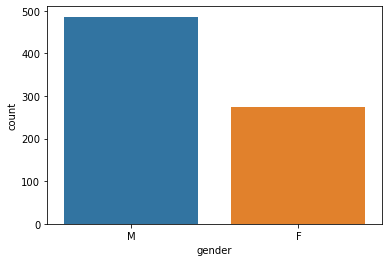

In [222]:
import seaborn as sns
sns.countplot(df.gender)

### Age Analysis

In [223]:
# See the value in column
#df["age"].value_counts(dropna=False)

In [224]:
# change column data type
df["age"].astype(int)

0        30
1        30
2        30
3        30
4        30
       ... 
1138    109
1139    110
1140    111
1141    113
1142     49
Name: age, Length: 1143, dtype: int32

In [225]:
# create a new column with generation by age 
bins= [0,23,39,45,74,150]
labels = ['Gen Z (0-23)','Gen Y (25-39)','Gen X (40-49)','Boomers(50-74)','Boomers inf(74-inf)']
df['age generations'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [226]:
df.head(1)

,ad_id,AdText,reporting_start,reporting_end,campaign_id,Location,Placements,fb_campaign_id,PeopleWhoMatch,age,...,impressions,clicks,spent,total_conversion,approved_conversion,CTR,CPC,CPM,CPA,age generations
0,708746,Join us because we care. Black matters.,17/08/2017,17/08/2017,916,United States: Baltimore (+20 km) Maryland; St...,News Feed on desktop computers or News Feed on...,103916,NaN,30,...,7350.0,1,1.43,2.0,1.0,0.013605,1.43,0.194558,0.715,Gen Y (25-39)


In [227]:
# create new column age range with range of age 
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['agerange'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)

In [228]:
df.head(1)

,ad_id,AdText,reporting_start,reporting_end,campaign_id,Location,Placements,fb_campaign_id,PeopleWhoMatch,age,...,clicks,spent,total_conversion,approved_conversion,CTR,CPC,CPM,CPA,age generations,agerange
0,708746,Join us because we care. Black matters.,17/08/2017,17/08/2017,916,United States: Baltimore (+20 km) Maryland; St...,News Feed on desktop computers or News Feed on...,103916,NaN,30,...,1,1.43,2.0,1.0,0.013605,1.43,0.194558,0.715,Gen Y (25-39),18-29


In [229]:
df["agerange"].value_counts()

30-39    491
18-29    326
70+       94
40-49     89
60-69     75
50-59      0
Name: agerange, dtype: int64

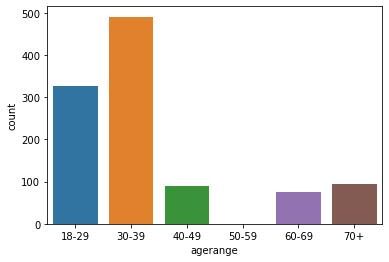

In [230]:
import seaborn as sns
sns.countplot(df.agerange)

In [235]:
print((df.groupby(['agerange'])).total_conversion.sum())
print((df.groupby(['agerange'])).ad_id.count())

agerange
18-29     199.0
30-39    1062.0
40-49     320.0
50-59       0.0
60-69      42.0
70+         0.0
Name: total_conversion, dtype: float64
agerange
18-29    326
30-39    491
40-49     89
50-59      0
60-69     75
70+       94
Name: ad_id, dtype: int64


In [242]:
print("AD CAMPAIGN  916")

print('age with more total conversions')
print((df_916.groupby(['age'])).total_conversion.sum())
print('----------')
print('age with more ads')
print((df_916.groupby(['age'])).ad_id.count())

print("-----------------")


print('AD CAMPAIGN 1178')

print('age with more total conversions')
print((df_1178.groupby(['age'])).total_conversion.sum())
print('age with more ads')
print((df_1178.groupby(['age'])).ad_id.count())


AD CAMPAIGN  916
age with more total conversions
age
30     9.0
31     9.0
32    12.0
39     4.0
40     8.0
41     5.0
42     5.0
44     6.0
Name: total_conversion, dtype: float64
----------
age with more ads
age
30     7
31     9
32    11
39     4
40     8
41     5
42     5
44     5
Name: ad_id, dtype: int64
-----------------
AD CAMPAIGN 1178
age with more total conversions
age
30     9.0
31     9.0
32    12.0
39     4.0
40     8.0
41     5.0
42     5.0
44     6.0
Name: total_conversion, dtype: float64
age with more ads
age
30     7
31     9
32    11
39     4
40     8
41     5
42     5
44     5
Name: ad_id, dtype: int64


* Though we can get more conversion by targeting 30-39 and 40-49,
* in there range of 30-49 the age 30,31,32, 40 convert much more. 


* The number of ads are also different. but we focus the budget for 30-39 and 18-29, 
* this last range of data generate low conversion.


* campaign 916 and 1178 have the same age conversion and cost.

In [246]:
#Return on advertising Spent (ROAS) which helps looking at the revenue as a percentage of the advertising spent.

#The following formula will be used for ROAS:
#ROAS = Revenue / Cost = (5* Total_Conversion + 50* Approved_Conversion) / Cost
df["Roas"] =  (df[ "total_conversion"]*5)  +  (df["approved_conversion"]*50) / df["spent"]

In [247]:
df.head(1)

,ad_id,AdText,reporting_start,reporting_end,campaign_id,Location,Placements,fb_campaign_id,PeopleWhoMatch,age,...,spent,total_conversion,approved_conversion,CTR,CPC,CPM,CPA,age generations,agerange,Roas
0,708746,Join us because we care. Black matters.,17/08/2017,17/08/2017,916,United States: Baltimore (+20 km) Maryland; St...,News Feed on desktop computers or News Feed on...,103916,NaN,30,...,1.43,2.0,1.0,0.013605,1.43,0.194558,0.715,Gen Y (25-39),18-29,44.965036


# FINAL REPORT

* The ideal campaign for the most efficient results can be created with the following metrics:
* Gender : M
* Age : 30 to 49 
* Interest Match : People who like Being Patriotic and Black Matters
* Location: United States /  Baltimore Maryland; Ferguson, St. Louis Missouri; Cleveland Ohio
* comunication : News Feed on desktop/mobile or Instagram Feed 